<a href="https://colab.research.google.com/github/jaderbr96/ITM-Inteligencia_Artificial/blob/main/Talleres/Segundo_Taller_IA84-3_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
X = np.array([[2,0.5],[2,6],[3,2],[4,5],[7,7],[7,5],[8,6]])

1.

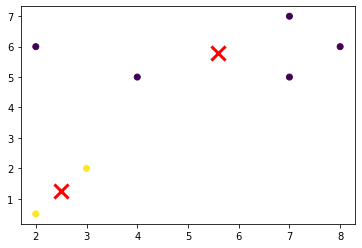

'labels: [1 0 1 0 0 0 0]'

In [ ]:
centroides = np.array([[3,7], [6,1]])
kmeans = KMeans(n_clusters=2, random_state=1, init=centroides, n_init=1).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.show()

f'labels: {kmeans.labels_}'

2.

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
clustering = DBSCAN(eps=3, min_samples=3).fit(X)
clustering.labels_ 

array([-1,  0, -1,  0,  0,  0,  0])

3.

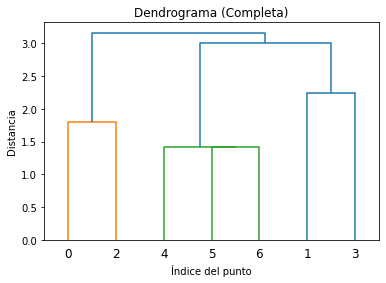

In [ ]:

# Definir los puntos
points = X

# Calcular la matriz de distancias Euclidianas
dist_matrix = pdist(points)

# Construir el dendrograma con la estrategia completa
link = linkage(dist_matrix, method='single')
dendro_complete = dendrogram(link)

# Mostrar el dendrograma
plt.title('Dendrograma (Completa)')
plt.xlabel('Índice del punto')
plt.ylabel('Distancia')
plt.show()

Distancias:
1.8
3.16
3.16
3.0


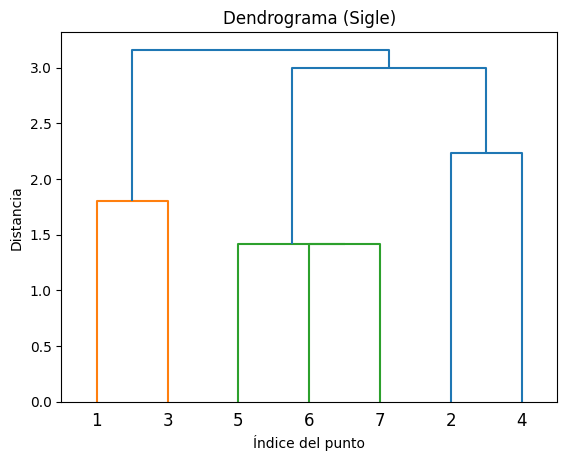

[[0.0, 1.8027756377319946, 1.8027756377319946, 0.0],
 [0.0, 1.4142135623730951, 1.4142135623730951, 0.0],
 [0.0, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951],
 [0.0, 2.23606797749979, 2.23606797749979, 0.0],
 [1.4142135623730951, 3.0, 3.0, 2.23606797749979],
 [1.8027756377319946, 3.1622776601683795, 3.1622776601683795, 3.0]]

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculamos la matriz de distancia euclidiana
dist_matrix = linkage(X, method='single', metric='euclidean')

# Creamos un dendrograma y obtenemos las distancias
dendrogram_info = dendrogram(dist_matrix, labels=['1', '2', '3', '4', '5', '6','7'])
distances = dendrogram_info.get('dcoord')

# Imprimimos las distancias redondeadas a 2 decimales
print("Distancias:")
for dist in distances[5]:
    print(round(dist, 2))

# Mostrar el dendrograma
plt.title('Dendrograma (Sigle)')
plt.xlabel('Índice del punto')
plt.ylabel('Distancia')
plt.show()

distances


Iteration 0: [[-2.423257    8.97707409]
 [-1.12875033 -2.43887185]
 [        nan         nan]]


<ipython-input-18-7d2397e70db0>:23: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])


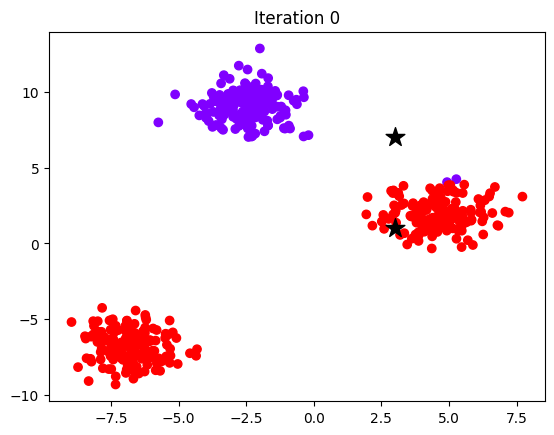

ValueError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generar datos aleatorios

# Número de clusters
k = 3

# Número máximo de iteraciones
max_iterations = 100

# Inicializar los centroides aleatorios
centroids = np.array([[3,7],[3,1]])

# Iterar hasta alcanzar la convergencia o el número máximo de iteraciones
for i in range(max_iterations):
    # Asignar cada punto de datos al cluster más cercano
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    labels = np.argmin(distances, axis=0)

    # Calcular los nuevos centroides
    new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

    # Imprimir los centroides
    print(f"Iteration {i}: {new_centroids}")

    # Mostrar los resultados de los clusters
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black')
    plt.title(f"Iteration {i}")
    plt.show()

    # Verificar si se ha alcanzado la convergencia
    if np.allclose(centroids, new_centroids):
        break

    centroids = new_centroids

# Mostrar los resultados finales de los clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black')
plt.title("Final Results")
plt.show()
